In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import time
import re

In [1]:
from collections import defaultdict

In [3]:
url = "https://www.basketball-reference.com/leagues/NBA_1950.html#all_team-stats-per_game"

In [ ]:
res = requests.get(url)

In [5]:
text = res.text

In [7]:
text = text.replace('<!--', '')

In [9]:
text = text.replace('--!>', '')

In [10]:

soup = BeautifulSoup(text,  "lxml")

In [14]:
item = soup.find_all(attrs={'class': 'table_container'})

In [22]:
text = res.text

In [117]:
url = "https://www.basketball-reference.com/leagues/NBA_1990.html"
res = requests.get(url)

In [118]:
text = res.text

In [120]:
text.split('<div class="table_outer_container">')[4]

'\n      <div class="table_container" id="div_team-stats-per_game">\n\t  \n  <table class="sortable stats_table" id="team-stats-per_game" data-cols-to-freeze=",2"><caption>Team Per Game Stats Table</caption>\n   <colgroup><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col></colgroup>\n   <thead>      \n      <tr>\n         <th aria-label="Rank" data-stat="ranker" scope="col" class="ranker poptip sort_default_asc show_partial_when_sorting right" data-tip="Rank" >Rk</th>\n         <th aria-label="Team" data-stat="team_name" scope="col" class=" poptip sort_default_asc left" >Team</th>\n         <th aria-label="Games" data-stat="g" scope="col" class=" poptip center" data-tip="Games" >G</th>\n         <th aria-label="Minutes Played" data-stat="mp" scope="col" class=" poptip center" data-tip="Minutes Played" >MP</th>\n         <th aria-label="Field Goals" data-stat="fg" scope="col" class=" poptip center" data-tip="Fiel

In [21]:
seasons = list(range(1951, 2021))

In [22]:
target_fields = ['pts', 'fg', 'fga', 'fta', 'orb', 'trb', 'ast', 'tov']

In [111]:
all_data = []
for season in seasons:
    print(f"Current Season: {season}")
    url = f"https://www.basketball-reference.com/leagues/NBA_{season}.html"
    res = requests.get(url)
    text = res.text
    text = text.replace('<!--', '')
    text = text.replace('--!>', '')
    soup = BeautifulSoup(text)
    item = soup.find_all(attrs={'class': 'table_container'})
    if season > 2015:
        #result = text.split('<div class="table_container">')[6]
        soup = item[5]
    elif season > 1970:
        #result = text.split('<div class="table_container">')[4]
        soup = item[3]
    else:
        #result = text.split('<div class="table_container">')[3]
        soup = item[2]
    #soup = BeautifulSoup(result)
    columns = list(soup.find(attrs={'class': 'stats_table'}).children)[5]
    data = list(soup.find(attrs={'class': 'stats_table'}).children)[7]
    
    season_data = []
    for item in data.findAll("tr"):
        cur_dict = {}
        for it in item.findAll("td"):
            if it.attrs['data-stat'].strip() in target_fields:
                value = 0.0
                if it.text.strip() != '':
                    value = float(it.text)
                cur_dict[it.attrs['data-stat'].strip()] = value
        cur_dict['season'] = season
        season_data.append(cur_dict)
    all_data.append(pd.DataFrame(season_data))
    time.sleep(0.2)

Current Season: 1951
Current Season: 1952
Current Season: 1953
Current Season: 1954
Current Season: 1955
Current Season: 1956
Current Season: 1957
Current Season: 1958
Current Season: 1959
Current Season: 1960
Current Season: 1961
Current Season: 1962
Current Season: 1963
Current Season: 1964
Current Season: 1965
Current Season: 1966
Current Season: 1967
Current Season: 1968
Current Season: 1969
Current Season: 1970
Current Season: 1971
Current Season: 1972
Current Season: 1973
Current Season: 1974
Current Season: 1975
Current Season: 1976
Current Season: 1977
Current Season: 1978
Current Season: 1979
Current Season: 1980
Current Season: 1981
Current Season: 1982
Current Season: 1983
Current Season: 1984
Current Season: 1985
Current Season: 1986
Current Season: 1987
Current Season: 1988
Current Season: 1989
Current Season: 1990
Current Season: 1991
Current Season: 1992
Current Season: 1993
Current Season: 1994
Current Season: 1995
Current Season: 1996
Current Season: 1997
Current Seaso

In [ ]:


"""all_data = []
for season in seasons:
    print(f"Current Season: {season}")
    url = f"https://www.basketball-reference.com/leagues/NBA_{season}.html"
    res = requests.get(url)
    text = res.text
    text = text.replace('<!--', '')
    text = text.replace('--!>', '')
    soup = BeautifulSoup(text)
    item = soup.find_all(attrs={'class': 'table_container'})
    if season > 2015:
        result = text.split('<div class="table_container">')[6]
    elif season > 1970:
        result = text.split('<div class="table_container">')[4]
    else:
        #result = text.split('<div class="table_container">')[3]
        result = items[4]
    columns = list(soup.find(attrs={'class': 'stats_table'}).children)[4]
    data = list(soup.find(attrs={'class': 'stats_table'}).children)[6]
    
    season_data = []
    for item in data.findAll("tr"):
        cur_dict = {}
        for it in item.findAll("td"):
            if it.attrs['data-stat'].strip() in target_fields:
                value = 0.0
                if it.text.strip() != '':
                    value = float(it.text)
                cur_dict[it.attrs['data-stat'].strip()] = value
        cur_dict['season'] = season
        season_data.append(cur_dict)
    all_data.append(pd.DataFrame(season_data))
    time.sleep(0.2)
"""

In [112]:
copy_all = all_data.copy()

In [113]:
full_df = pd.concat(copy_all)

In [114]:
per_g_values = full_df.groupby('season').mean().reset_index()

In [115]:
full_df

,fg,fga,fta,orb,trb,ast,tov,pts,season
0,29.9,81.3,35.0,0.0,50.7,22.9,0.0,85.2,1951
1,29.9,79.1,33.1,0.0,44.3,20.1,0.0,84.6,1951
2,29.2,88.8,35.7,0.0,54.6,21.7,0.0,84.3,1951
3,29.4,87.2,35.1,0.0,54.8,16.8,0.0,84.1,1951
4,28.5,81.3,39.9,0.0,49.4,22.6,0.0,86.1,1951
5,30.9,81.5,33.8,0.0,51.8,23.5,0.0,85.8,1951
6,30.1,85.8,33.0,0.0,54.3,21.7,0.0,85.4,1951
7,30.6,82.2,29.3,0.0,50.1,20.7,0.0,82.8,1951
8,30.8,85.0,28.0,0.0,40.9,21.4,0.0,81.7,1951
9,29.6,84.0,30.6,0.0,46.1,20.4,0.0,82.0,1951


In [116]:
per_g_values

,season,fg,fga,fta,orb,trb,ast,tov,pts
0,1951,29.681818,83.536364,33.418182,0.000000,49.254545,20.772727,0.000000,83.936364
1,1952,29.630000,80.840000,33.250000,0.000000,54.510000,21.890000,0.000000,83.690000
2,1953,28.520000,77.120000,35.880000,0.000000,51.520000,20.990000,0.000000,82.690000
3,1954,28.055556,75.355556,33.055556,0.000000,50.900000,20.344444,0.000000,79.544444
4,1955,29.588889,76.800000,31.933333,0.000000,49.822222,21.000000,0.000000,82.744444
5,1956,35.337500,91.400000,38.050000,0.000000,60.112500,24.287500,0.000000,99.037500
6,1957,35.937500,94.550000,36.950000,0.000000,62.400000,18.862500,0.000000,99.625000
7,1958,39.025000,101.862500,38.275000,0.000000,71.675000,19.637500,0.000000,106.637500
8,1959,40.412500,102.325000,36.312500,0.000000,70.050000,19.612500,0.000000,108.262500
9,1960,44.487500,108.675000,35.850000,0.000000,73.500000,22.550000,0.000000,115.337500


Assumptions:

* AST / TO ratio is around 1.25

* ORB / TRB ratio is around 0.3

In [117]:
subset = per_g_values.loc[per_g_values.season < 1974]

In [118]:
subset.loc[:, 'orb'] = 0.3 * subset.trb

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [119]:
subset.loc[:, 'tov'] = subset.ast / 1.25

In [120]:
per_g_values.loc[per_g_values.season < 1974] = subset

In [121]:
per_g_values.loc[:, 'poss'] = per_g_values.fga - per_g_values.orb + per_g_values.tov + per_g_values.fta * 0.44

In [122]:
per_g_values.loc[:, 'ts_pct'] = per_g_values.pts / (2 * (per_g_values.fga + 0.44 * per_g_values.fta)) * 100

In [123]:
per_g_values

,season,fg,fga,fta,orb,trb,ast,tov,pts,poss,ts_pct
0,1951,29.681818,83.536364,33.418182,14.776364,49.254545,20.772727,16.618182,83.936364,100.082182,42.719897
1,1952,29.630000,80.840000,33.250000,16.353000,54.510000,21.890000,17.512000,83.690000,96.629000,43.830523
2,1953,28.520000,77.120000,35.880000,15.456000,51.520000,20.990000,16.792000,82.690000,94.243200,44.501395
3,1954,28.055556,75.355556,33.055556,15.270000,50.900000,20.344444,16.275556,79.544444,90.905556,44.240514
4,1955,29.588889,76.800000,31.933333,14.946667,49.822222,21.000000,16.800000,82.744444,92.704000,45.538711
5,1956,35.337500,91.400000,38.050000,18.033750,60.112500,24.287500,19.430000,99.037500,109.538250,45.790488
6,1957,35.937500,94.550000,36.950000,18.720000,62.400000,18.862500,15.090000,99.625000,107.178000,44.953884
7,1958,39.025000,101.862500,38.275000,21.502500,71.675000,19.637500,15.710000,106.637500,112.911000,44.917589
8,1959,40.412500,102.325000,36.312500,21.015000,70.050000,19.612500,15.690000,108.262500,112.977500,45.756641
9,1960,44.487500,108.675000,35.850000,22.050000,73.500000,22.550000,18.040000,115.337500,120.439000,46.339263


In [124]:
plt.style.use('fivethirtyeight')

In [131]:
per_g_values.ts_pct

0     42.719897
1     43.830523
2     44.501395
3     44.240514
4     45.538711
        ...    
65    54.121371
66    55.233523
67    55.615644
68    55.956656
69    56.425178
Name: ts_pct, Length: 70, dtype: float64

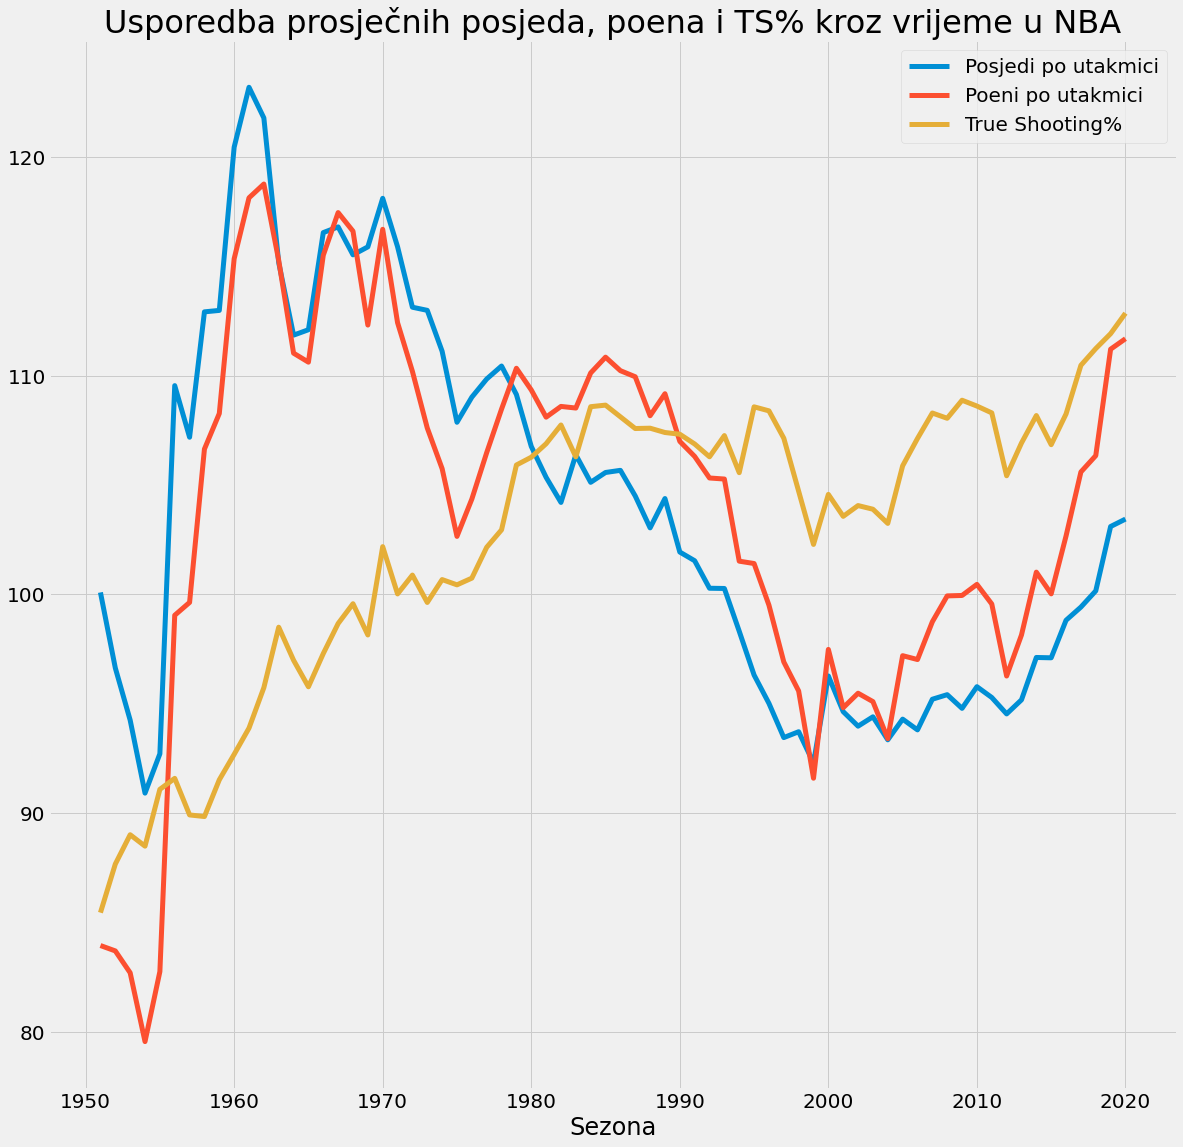

In [125]:
fig, ax = plt.subplots(figsize=(18, 18))

ax.plot(per_g_values.season, per_g_values.poss, label='Posjedi po utakmici', lw=5)
ax.plot(per_g_values.season, per_g_values.pts, label='Poeni po utakmici', lw=5)
ax.plot(per_g_values.season, per_g_values.ts_pct * 2, label='True Shooting%', lw=5)

ax.legend(fontsize=20)
ax.set_title("Usporedba prosječnih posjeda, poena i TS% kroz vrijeme u NBA", size=32)
ax.set_xlabel("Sezona", size=24)
ax.tick_params(labelsize=20)

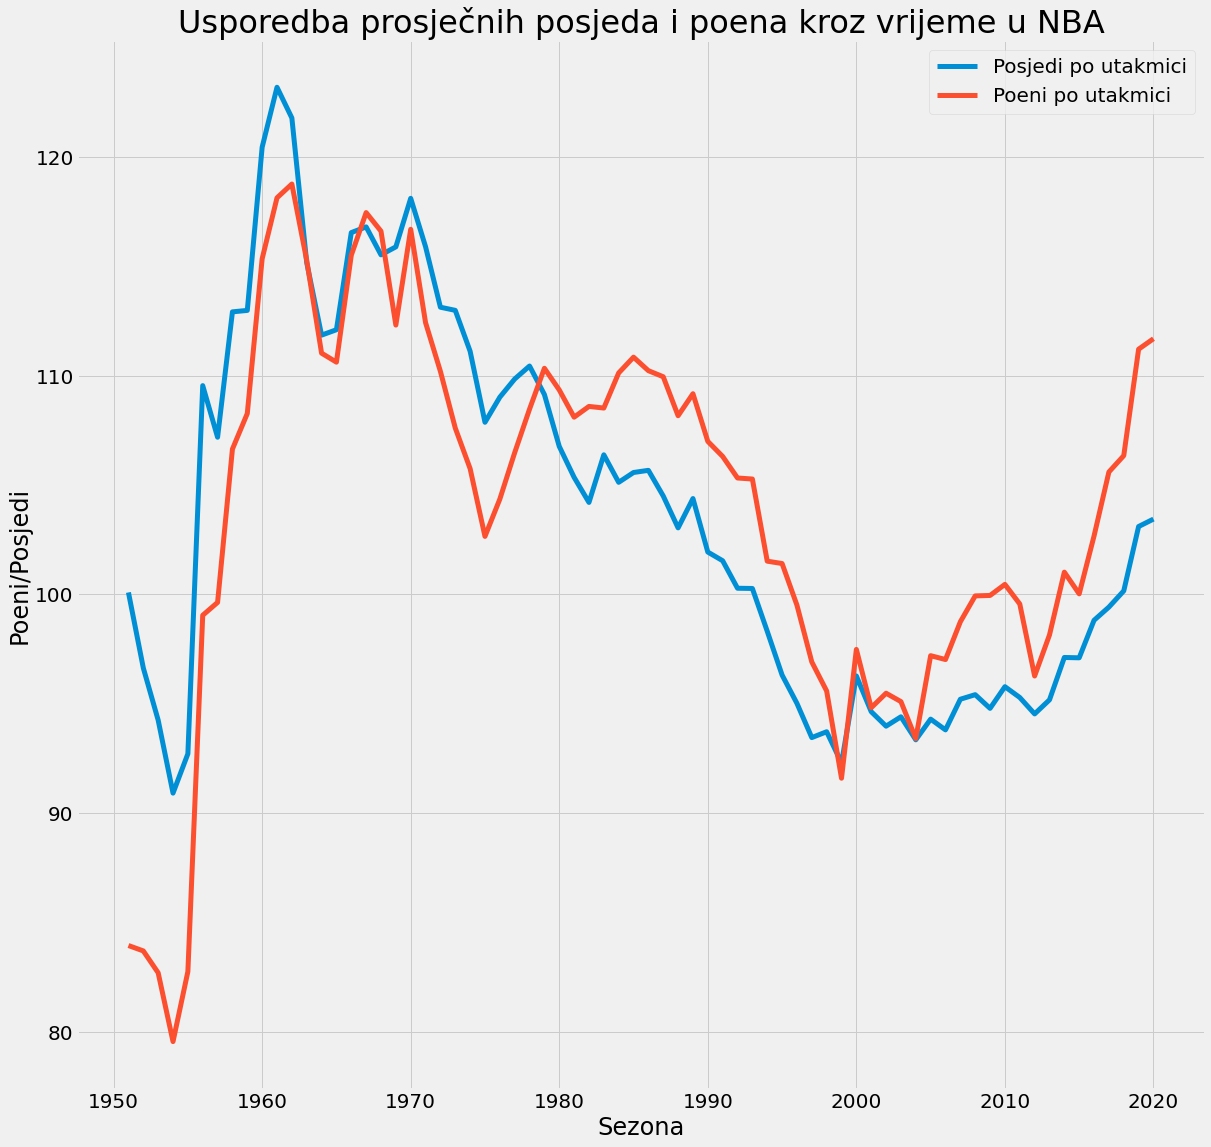

In [126]:
fig, ax = plt.subplots(figsize=(18, 18))

ax.plot(per_g_values.season, per_g_values.poss, label='Posjedi po utakmici', lw=5)
ax.plot(per_g_values.season, per_g_values.pts, label='Poeni po utakmici', lw=5)

ax.legend(fontsize=20)
ax.set_title("Usporedba prosječnih posjeda i poena kroz vrijeme u NBA", size=32)
ax.set_xlabel("Sezona", size=24)
ax.set_ylabel("Poeni/Posjedi", size=24)
ax.tick_params(labelsize=20)

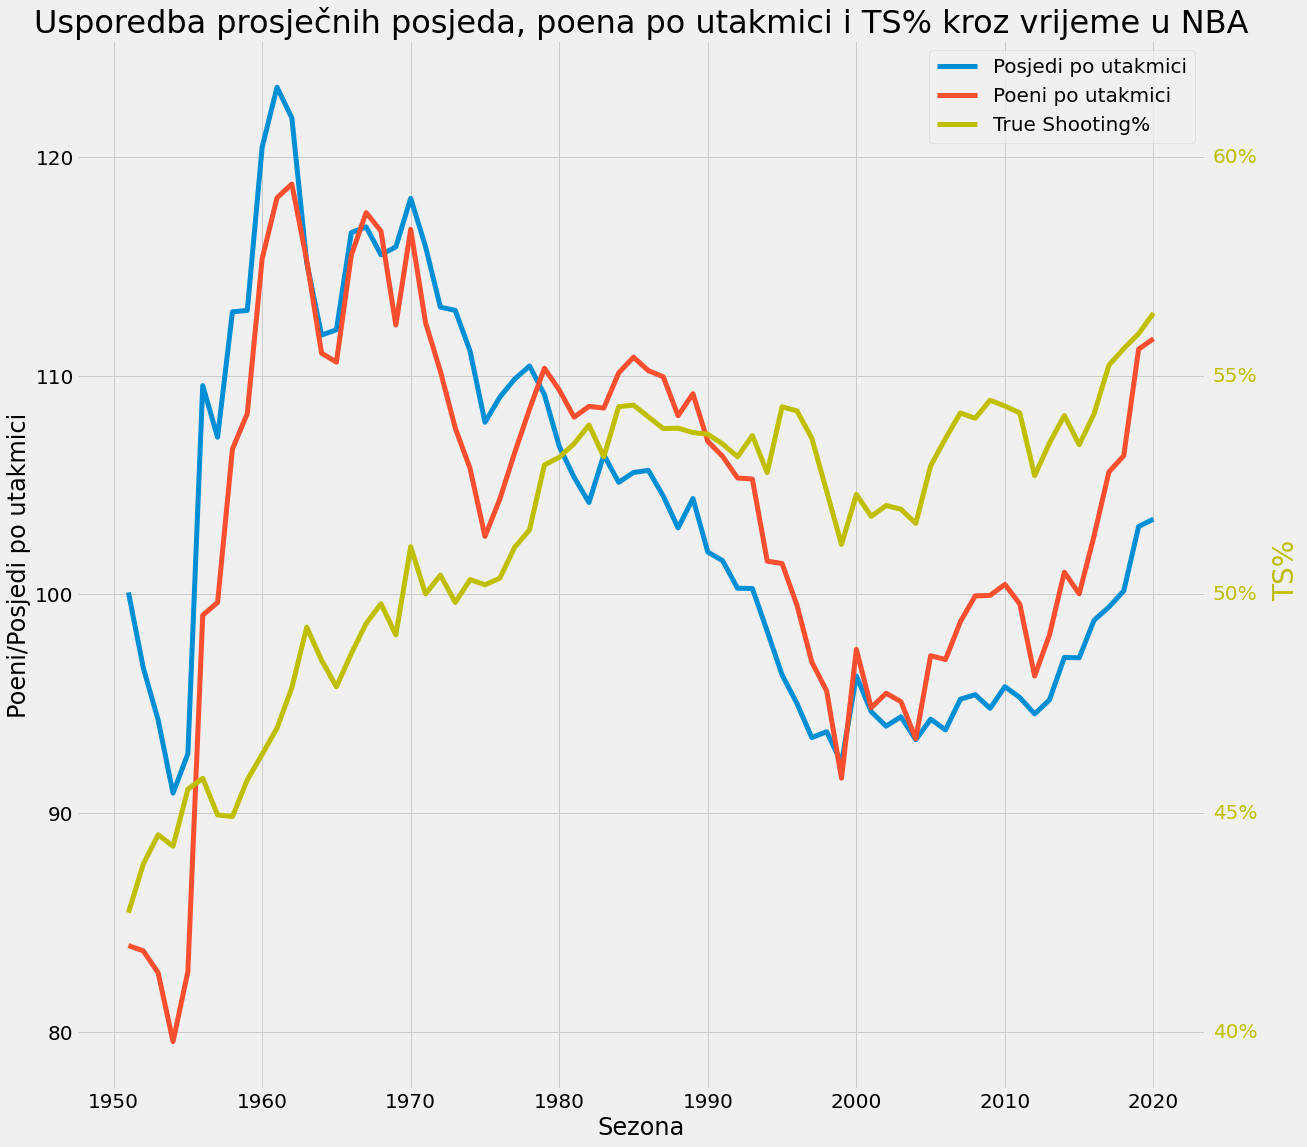

In [142]:
fig, ax = plt.subplots(figsize=(18, 18))

ax.plot(per_g_values.season, per_g_values.poss, label='Posjedi po utakmici', lw=5)
ax.plot(per_g_values.season, per_g_values.pts, label='Poeni po utakmici', lw=5)
ax.plot(per_g_values.season, per_g_values.ts_pct * 2, label='True Shooting%', lw=5, color='y')



ax.text(x=2024, y=80, s="40%", size=20, color='y', va='center')
ax.text(x=2024, y=90, s="45%", size=20, color='y', va='center')
ax.text(x=2024, y=100, s="50%", size=20, color='y', va='center')
ax.text(x=2024, y=110, s="55%", size=20, color='y', va='center')
ax.text(x=2024, y=120, s="60%", size=20, color='y', va='center')
ax.text(x=2028, y=100, s="TS%", size=28, rotation=90, color='y')
#ax.set_xticks([item for item in range(1950, 2021)])
#ax2.set_yticks([item for item in range(50, 55, 2)])
#ax2.set_ylabel('TS%', color='y', size=24)  # we already handled the x-label with ax1
#ax.plot(per_g_values.season, per_g_values.ts_pct * 2, color='y', label='True Shooting%')
#ax2.tick_params(axis='y', labelcolor='y', labelsize=20)

ax.set_ylabel("Poeni/Posjedi po utakmici", size=24)
ax.legend(fontsize=20)
ax.set_title("Usporedba prosječnih posjeda, poena po utakmici i TS% kroz vrijeme u NBA", size=32)
ax.set_xlabel("Sezona", size=24)
ax.tick_params(labelsize=20)

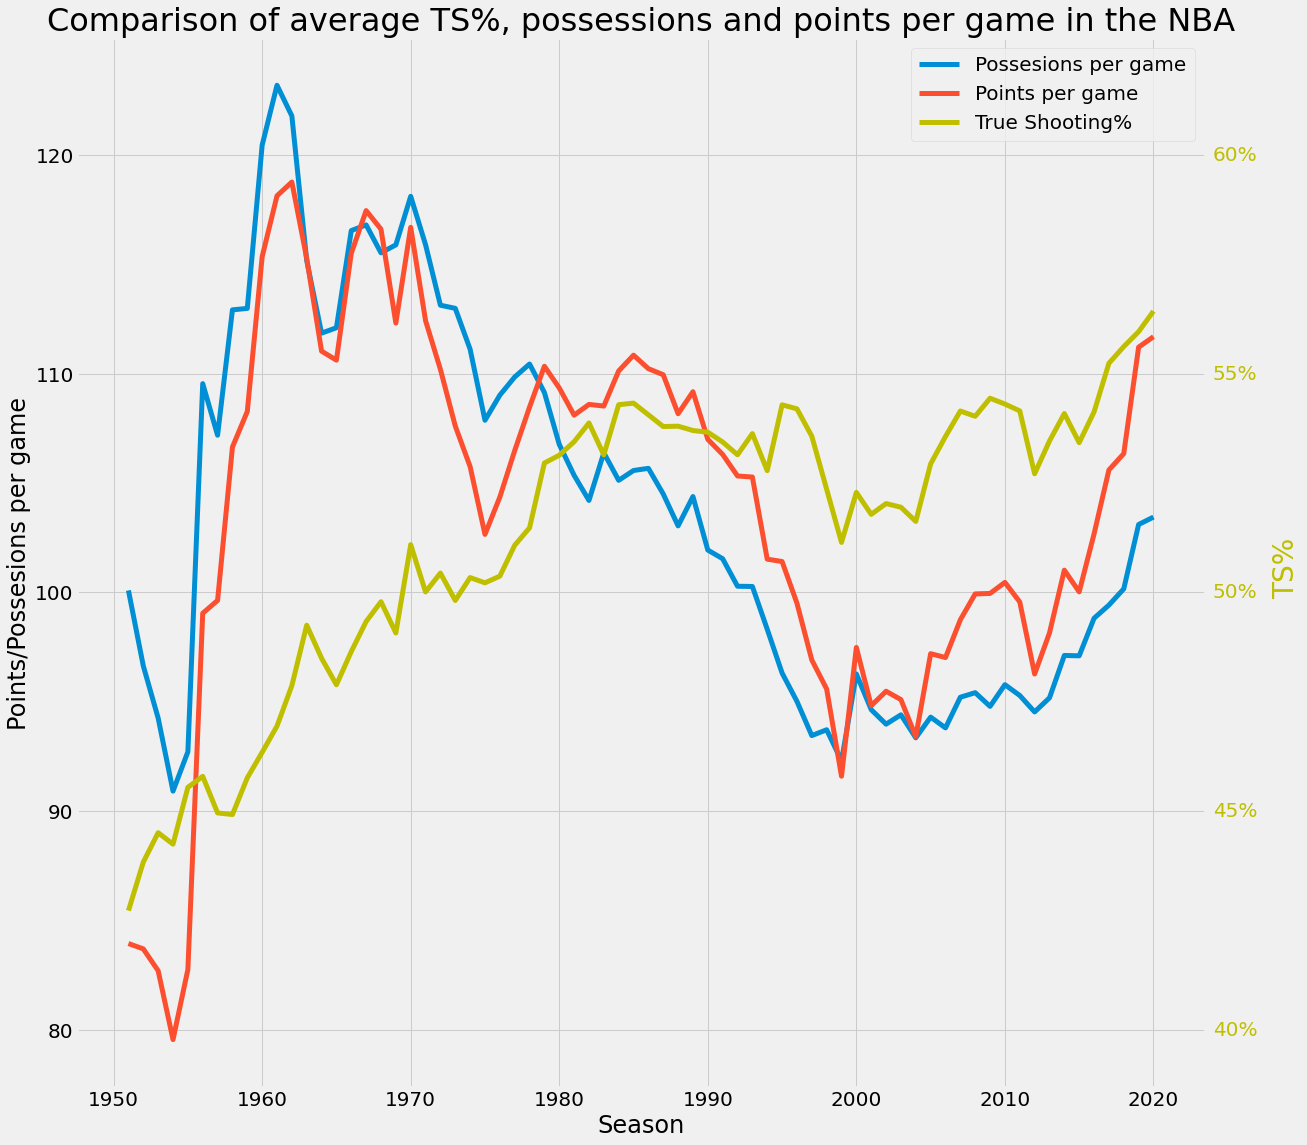

In [143]:
fig, ax = plt.subplots(figsize=(18, 18))

ax.plot(per_g_values.season, per_g_values.poss, label='Possesions per game', lw=5)
ax.plot(per_g_values.season, per_g_values.pts, label='Points per game', lw=5)
ax.plot(per_g_values.season, per_g_values.ts_pct * 2, label='True Shooting%', lw=5, color='y')



ax.text(x=2024, y=80, s="40%", size=20, color='y', va='center')
ax.text(x=2024, y=90, s="45%", size=20, color='y', va='center')
ax.text(x=2024, y=100, s="50%", size=20, color='y', va='center')
ax.text(x=2024, y=110, s="55%", size=20, color='y', va='center')
ax.text(x=2024, y=120, s="60%", size=20, color='y', va='center')
ax.text(x=2028, y=100, s="TS%", size=28, rotation=90, color='y')
#ax2.set_ylabel('TS%', color='y', size=24)  # we already handled the x-label with ax1
#ax.plot(per_g_values.season, per_g_values.ts_pct * 2, color='y', label='True Shooting%')
#ax2.tick_params(axis='y', labelcolor='y', labelsize=20)

ax.set_ylabel("Points/Possesions per game", size=24)
ax.legend(fontsize=20)
ax.set_title("Comparison of average TS%, possessions and points per game in the NBA", size=32)
ax.set_xlabel("Season", size=24)
ax.tick_params(labelsize=20)